In [457]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
from lxml import html
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [458]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [459]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [460]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.006442773698145,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005102583402028,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.00500685241788,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004989589838072,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [461]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [462]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [463]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [464]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [465]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 










In [466]:
a = [data.crew[i].split(', ') for i in range(len(data.crew))]
s = []
for i in range (len(data.crew)):
    s += a[i]
for i in range (len(s)):
    if '(dir.)' in s[i]:
        s[i] = s[i].replace(' (dir.)', '')

print(set(s))
print(len(set(s)),'уникальных имён', sep = ' ')

{'Michael Curtiz', 'Olivia Colman', 'Yôji Matsuda', 'Brad Pitt', 'Lee Unkrich', 'Elissa Knight', 'Tom Holland', 'Chris Hemsworth', 'Andie MacDowell', 'Alec Guinness', 'Myrna Loy', 'Orson Welles', 'Michael Mann', 'Nadine Labaki', 'Yordanos Shiferaw', 'Christian Bale', 'Fred MacMurray', 'Bette Davis', 'Billy Crystal', 'Brahim Hadjadj', 'Rajkumar Hirani', 'Christopher Lloyd', 'Bruce Willis', 'George Roy Hill', 'Sophie Okonedo', 'Ralph Fiennes', 'George Lucas', 'Wilford Brimley', 'Harrison Ford', 'Brad Bird', 'Darío Grandinetti', 'Jean Arthur', 'Joaquin Phoenix', 'Ellen Burstyn', 'Mone Kamishiraishi', 'William Holden', 'Lin-Manuel Miranda', 'Victor Sjöström', 'Tom Hanks', 'Thomas Kail', 'Roy Scheider', 'Gore Verbinski', 'Sergio Leone', 'Uma Thurman', 'Toshirô Mifune', 'Harvey Keitel', 'Dana Andrews', 'Ralph Meeker', 'Carl Theodor Dreyer', 'Matthew Modine', 'John Ford', 'Malcolm McDowell', 'Guillermo del Toro', 'Marlon Brando', 'Hilary Swank', 'Shameik Moore', 'Suzanne Pleshette', 'Mathieu 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.


In [467]:
a = [data.crew[i].split(', ') for i in range(len(data.crew))]
s = []
for i in range (len(data.crew)):
    s += a[i]
dir = []
for i in range (len(s)):
    if '(dir.)' in s[i]:
        dir.append(s[i])
d = {'dir': pd.Series(dir)}
df = pd.DataFrame(d)
df = df['dir'].value_counts().rename_axis('Dir').reset_index(name='Amount')
df

,Dir,Amount
0,Martin Scorsese (dir.),7
1,Akira Kurosawa (dir.),7
2,Christopher Nolan (dir.),7
3,Steven Spielberg (dir.),7
4,Stanley Kubrick (dir.),7
...,...,...
149,Jean-Pierre Jeunet (dir.),1
150,Orson Welles (dir.),1
151,Elem Klimov (dir.),1
152,Thomas Vinterberg (dir.),1


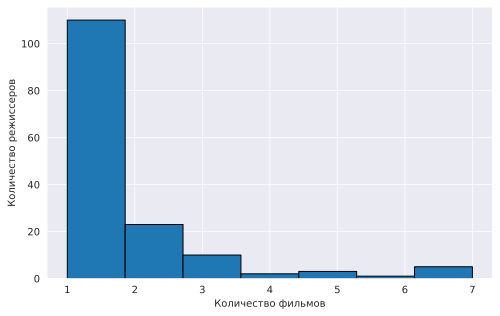

In [468]:
data["dir"] = dir

visual = data["dir"].value_counts()
fig, ax = plt.subplots()
plt.hist(visual, edgecolor = "black", bins=7, align="mid")
ax.set_xlabel("Количество фильмов")
ax.set_ylabel("Количество режиссеров")
plt.show()

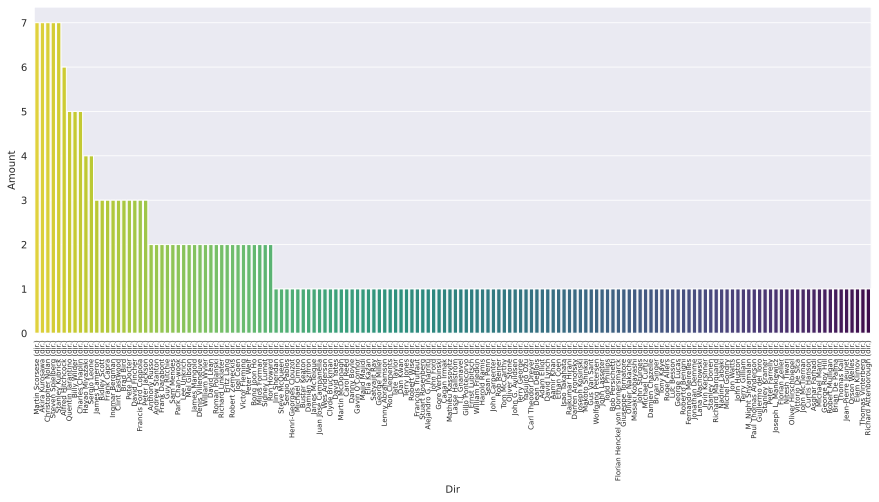

Директора, снявшие наибольшее количество топ-фильмов: Martin Scorsese (dir.), Akira Kurosawa (dir.), Christopher Nolan (dir.), Steven Spielberg (dir.), Stanley Kubrick (dir.)


In [469]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
g = sns.barplot(data=df, x='Dir', y='Amount', ci=False, palette='viridis_r')
g.set_xticklabels(df['Dir'], rotation=90, fontdict={'fontsize':7})
plt.show()

res = [i[0] for i in data["dir"].value_counts().items() if i[1] == 7]
print("Директора, снявшие наибольшее количество топ-фильмов:", ', '.join(res))

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

In [470]:
a = [data.crew[i].split(', ') for i in range(len(data.crew))]
s = []
for i in range (len(data.crew)):
    s += a[i]
memb = []
for i in range (len(s)):
    if '(dir.)' not in s[i]:
        memb.append(s[i])
d = pd.Series(memb)
max_count = d.value_counts().max()
max_count_memb = [i[0] for i in d.value_counts().iteritems() if i[1] > max_count - 4]
print('Топ три члена команды:', ', '.join(max_count_memb), "из", len(set(memb)), "человек")

Топ три члена команды: Robert De Niro, Tom Hanks, Harrison Ford из 382 человек


In [471]:
data

,movies,ratings,crew,links,title,year,dir
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont (dir.)
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola (dir.)
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan (dir.)
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,Francis Ford Coppola (dir.)
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet (dir.)
...,...,...,...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.006442773698145,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/,Dersu Uzala,1975,Akira Kurosawa (dir.)
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005102583402028,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/,The Iron Giant,1999,Brad Bird (dir.)
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.00500685241788,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/,The Help,2011,Tate Taylor (dir.)
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004989589838072,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/,Aladdin,1992,Ron Clements (dir.)


Задача 4. Построить распределение топовых фильмов по годам

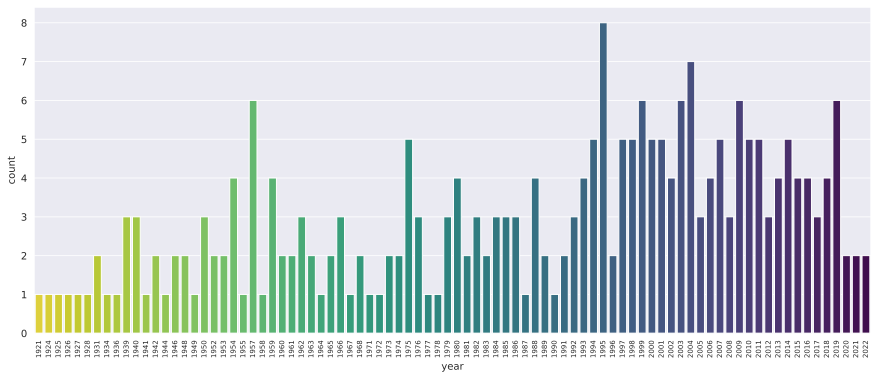

In [472]:
year = [data[0] for data in data["year"].value_counts().iteritems()]
count = [data[1] for data in data["year"].value_counts().iteritems()]
res = {"year": year, "count": count}
count_res = pd.DataFrame(res)

count_res = count_res.sort_values(by="year", ascending=True)

plt.figure(figsize=(15,6))
sns.set_style('darkgrid')

y = sns.barplot(data=count_res, x='year', y='count', ci=False, palette='viridis_r')
y.set_xticklabels(count_res['year'], rotation=90, fontdict={'fontsize':7})
plt.show()

In [473]:
count_res

,year,count
75,1921,1
69,1924,1
66,1925,1
67,1926,1
73,1927,1
...,...,...
18,2018,4
5,2019,6
49,2020,2
63,2021,2


Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать


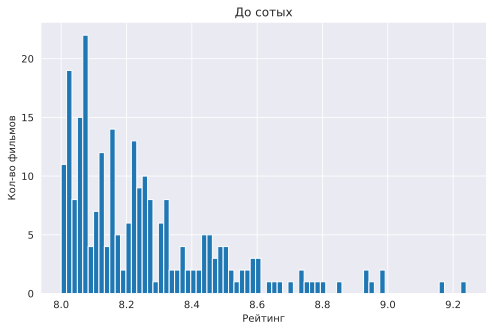

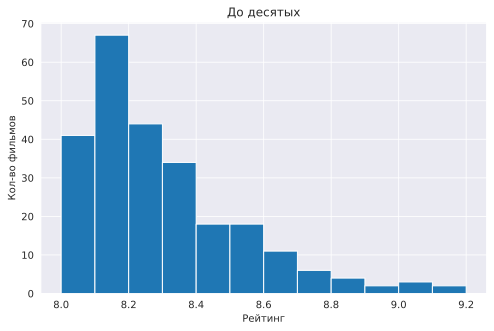

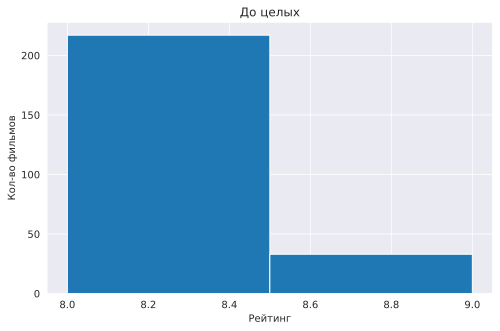

In [475]:
rating100 = data.ratings.values.astype(float).round(2)
rating10 = data.ratings.values.astype(float).round(1)
rating1 = data.ratings.values.astype(float).round(0)

fig, ax = plt.subplots()
plt.hist(rating100, bins = len(set(rating100)))
plt.title('До сотых')
ax.set_xlabel("Рейтинг")
ax.set_ylabel("Кол-во фильмов")
plt.show()

fig, ax = plt.subplots()
plt.hist(rating10, bins = len(set(rating10)))
plt.title('До десятых')
ax.set_xlabel("Рейтинг")
ax.set_ylabel("Кол-во фильмов")
plt.show()

fig, ax = plt.subplots()
plt.hist(rating1, bins = len(set(rating1)))
plt.title('До целых')
ax.set_xlabel("Рейтинг")
ax.set_ylabel("Кол-во фильмов")
plt.show()

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [476]:
url = "http://www.imdb.com"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}
listfilm = []

for i in (data["links"]):
    film_url = url + i
    html_text = requests.get(film_url, headers=headers).text
    soup = BeautifulSoup(html_text, "lxml")
    listfilm.append(soup.find_all(attrs={"name": "description"})[0].get("content"))

data["opisanie"] = listfilm 
data["opisanie"]

0      The Shawshank Redemption: Directed by Frank Da...
1      The Godfather: Directed by Francis Ford Coppol...
2      The Dark Knight: Directed by Christopher Nolan...
3      The Godfather Part II: Directed by Francis For...
4      12 Angry Men: Directed by Sidney Lumet. With M...
                             ...                        
245    Dersu Uzala: Directed by Akira Kurosawa. With ...
246    The Iron Giant: Directed by Brad Bird. With Je...
247    The Help: Directed by Tate Taylor. With Emma S...
248    Aladdin: Directed by Ron Clements, John Musker...
249    Gandhi: Directed by Richard Attenborough. With...
Name: opisanie, Length: 250, dtype: object


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 



In [477]:
data["opisanie"]

0      The Shawshank Redemption: Directed by Frank Da...
1      The Godfather: Directed by Francis Ford Coppol...
2      The Dark Knight: Directed by Christopher Nolan...
3      The Godfather Part II: Directed by Francis For...
4      12 Angry Men: Directed by Sidney Lumet. With M...
                             ...                        
245    Dersu Uzala: Directed by Akira Kurosawa. With ...
246    The Iron Giant: Directed by Brad Bird. With Je...
247    The Help: Directed by Tate Taylor. With Emma S...
248    Aladdin: Directed by Ron Clements, John Musker...
249    Gandhi: Directed by Richard Attenborough. With...
Name: opisanie, Length: 250, dtype: object

In [478]:
spisok = []
for i in data["opisanie"]:
    i = i.split("With")[1]
    i = re.split("\.", i)[0]   
    spisok.append(i)

spisok

[' Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 ' Marlon Brando, Al Pacino, James Caan, Richard S',
 ' Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 ' Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro',
 ' Martin Balsam, John Fiedler, Lee J',
 ' Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall',
 ' Noel Appleby, Ali Astin, Sean Astin, David Aston',
 ' Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta',
 ' Alan Howard, Noel Appleby, Sean Astin, Sala Baker',
 ' Eli Wallach, Clint Eastwood, Lee Van Cleef, Aldo Giuffrè',
 ' Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys',
 ' Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier',
 ' Bruce Allpress, Sean Astin, John Bach, Sala Baker',
 ' Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Tom Hardy',
 ' Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams',
 ' Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 ' Robert De Niro, Ray Liotta, Joe Pes

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.




In [479]:
url = "http://www.imdb.com/chart/top"
html_text = requests.get(url).text
soup = BeautifulSoup(html_text, "lxml")
soup = soup.find_all(attrs={'class': 'ratingColumn imdbRating'})
res = []
soup
len(soup)
soup[0]
for i in soup:
    res.append(int(str(i.contents[1]).split("on ")[-1].split(" user")[0].replace(",","")))
data["count marks"] = res
data["count marks"]
data


res2 = data[["title", "count marks"]].sort_values("count marks", ascending=False)
res2.head(10)

,title,count marks
0,The Shawshank Redemption,2672223
2,The Dark Knight,2645081
13,Inception,2344567
11,Fight Club,2117660
10,Forrest Gump,2072138
7,Pulp Fiction,2047231
15,The Matrix,1908661
8,The Lord of the Rings: The Fellowship of the Ring,1870868
1,The Godfather,1851996
6,The Lord of the Rings: The Return of the King,1841614


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов




In [480]:
words = []
for i in range(len(data["title"])):
    #print(data["title"][i])
    s = (data["title"][i]).split(' ')
    for k in range(len(s)):
        words.append(s[k].lower())
df2 = pd.Series(words)
df2 = df2.value_counts().rename_axis('в названии фильмов').reset_index(name='Amount')
df2.head(10)

,в названии фильмов,Amount
0,the,94
1,of,30
2,a,12
3,and,10
4,to,7
5,for,6
6,in,5
7,wild,3
8,my,3
9,once,3


In [481]:
words = []
for i in range(len(data["opisanie"])):
    #print(data["title"][i])
    s = (data["opisanie"][i]).split(' ')
    for k in range(len(s)):
        words.append(s[k].lower())
df3 = pd.Series(words)
df3 = df3.value_counts().rename_axis('в описании фильмов').reset_index(name='Amount')
df3.head(10)

,в описании фильмов,Amount
0,the,453
1,a,407
2,with,313
3,by,295
4,directed,250
5,to,237
6,of,235
7,and,186
8,in,155
9,his,144


In [483]:
words = []
for i in range(len(data["opisanie"])):
    #print(data["title"][i])
    s = (data["opisanie"][i]).split(' ')
    for k in range(len(s)):
        words.append(s[k].lower())
for i in range(len(data["title"])):
    #print(data["title"][i])
    s = (data["title"][i]).split(' ')
    for k in range(len(s)):
        words.append(s[k].lower())    
df4 = pd.Series(words)
df4 = df4.value_counts().rename_axis('в названии и в описании фильмов').reset_index(name='Amount')
df4.head(10)

,в названии и в описании фильмов,Amount
0,the,547
1,a,419
2,with,314
3,by,297
4,of,265
5,directed,250
6,to,244
7,and,196
8,in,160
9,his,144


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)